<a href="https://colab.research.google.com/github/momo1606/Covid-19-Time-series-prediction-dashboard/blob/master/Deep_learning_time_series_Tf_covid_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [ ]:
df= pd.read_csv('a.csv')
df.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,active,active_per,growth_active,growth_tot
0,30 January,1,1,0,0,0,0,1,100.0,1.0,1.0
1,31 January,0,1,0,0,0,0,1,100.0,1.0,1.0
2,01 February,0,1,0,0,0,0,1,100.0,1.0,1.0
3,02 February,1,2,0,0,0,0,2,100.0,2.0,2.0
4,03 February,1,3,0,0,0,0,3,100.0,1.5,1.5


In [ ]:
series= df.growth_tot.values

In [ ]:
time = range(len(series))

In [ ]:
time=time[50:]

In [ ]:
series =series[50:]

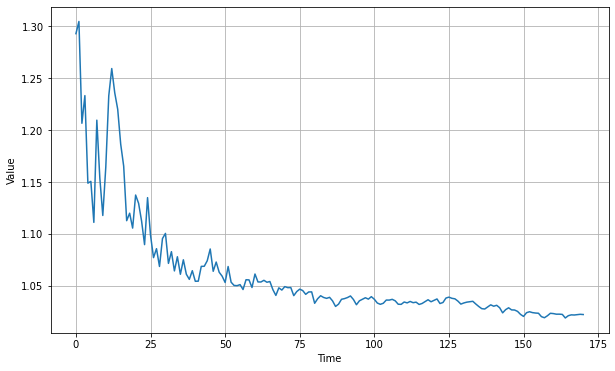

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time,series)


In [ ]:
window_size = 7
batch_size = 28
shuffle_buffer_size = 140
split_time = 140
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

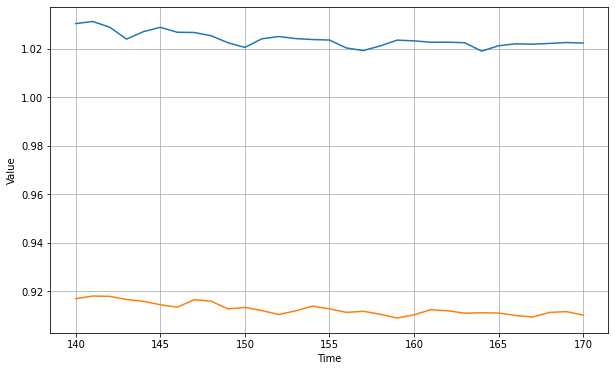

In [ ]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

0.11112947

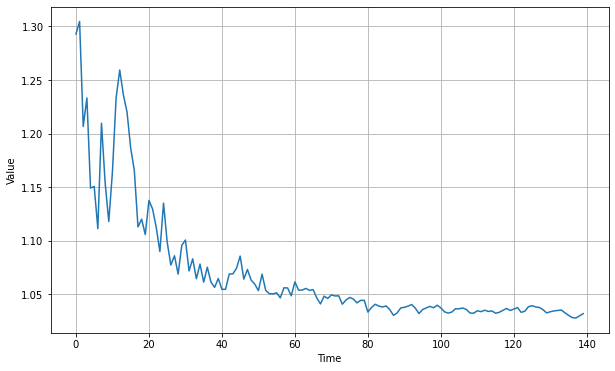

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)

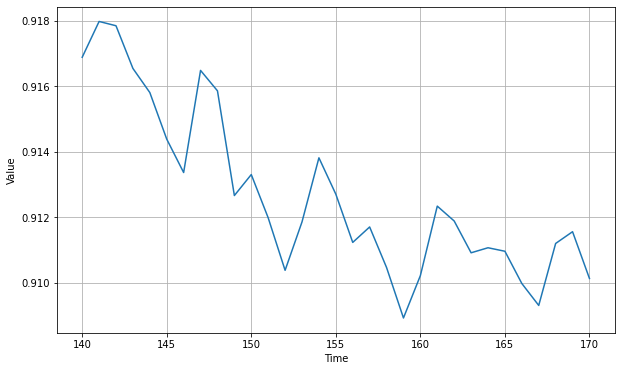

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, results)